<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_SprintII(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics - Sprint II(B)
### Bruno Odon

## Descrição do problema

Instalando as bibliotecas TensorFlow e Keras

In [4]:
!pip install tensorflow
!pip install keras

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

In [7]:
!mkdir -pv datasets/music
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip' -P datasets/

--2023-07-19 19:34:00--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10632185 (10M) [application/zip]
Saving to: ‘datasets/music.zip.1’

music.zip.1         100%[===================>]  10.14M  --.-KB/s    in 0.1s    

2023-07-19 19:34:01 (80.4 MB/s) - ‘datasets/music.zip.1’ saved [10632185/10632185]



In [8]:
import zipfile
dataset = 'datasets/music.zip'
dest = 'datasets/music/'
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall(dest)

In [9]:
#verificando o número de imagens que foram extraídas
path='datasets/music/'
print(f"Temos um total de {len(os.listdir(path))} imagens em nosso dataset")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path)[:20]}")


Temos um total de 2596 imagens em nosso dataset
Primeiras 20 imagens: 
 ['1634117972100_Guitar Back Amp with Powered Pa System for sale.jpg', '1634112498970_BOYA BYWHM8 Pro Wireless Handheld Microphone for sale.jpg', '1634112358159_Pioneer EFX500 DJ Effects ControllerJAPAN for sale.jpg', '1634118001273_Boya M1DM Dual Mic for sale.jpg', '1634111157863_YAMAHA Piano for sale.jpg', '1634112841166_Dj Light Stand for sale.jpg', '1634112920947_Guitar for sale.jpg', '1634110584381_Electric Guitar for sale.jpg', '1634117638438_Fiber Dholky for sale.jpg', '1634117578620_Cashio organ for sale.jpg', '1634117867993_Pro instrument cable for sale.jpg', '1634109704493_Saxaphone  Soprano for sale.jpg', '1634110189621_YAMAHA FX900 SIMULEFFECT PROCESSOR for sale.jpg', '1634112802198_Japan Amplifier for sale.jpg', '1634110386536_Professional Studio Recording Microphone Stand Small for sale.jpg', '1634112801953_DJ System for sale.jpg', '1634112953454_Warwick Rockbass Streamer lx 5 Bass Guitar for sale.jpg'

In [10]:
from sklearn.preprocessing import FunctionTransformer
import re
#Criando um DataFrame com as informações das imagens

images = os.listdir(path)
labels, heights, widths, channels, filesize, files = [], [], [], [], [], []

# Loop que percorre cada uma das imagens extraídas
for fname in images:
    try:
      def file_settings():
          img_shape = mpimg.imread(path+fname).shape
          heights.append(img_shape[0])
          widths.append(img_shape[1])
          channels.append(img_shape[2])
          filesize.append(os.path.getsize(path+fname))
      inst_type = str(fname)[14:].replace('.jpg', '').replace('for sale', '')
      if (not ('Amplifier' or 'Amp') and 'Bass Guitar' or 'Bass') in inst_type:
        name = "Bass Guitar"
        files.append(fname)
        labels.append(name)
        file_settings()
      if 'Acoustic Guitar' in inst_type:
        name = "Acoustic Guitar"
        files.append(fname)
        labels.append(name)
        file_settings()
      if (not ("Bass" or "Amp" or "Amplifier" or "amplifier" or "Pedals" or "pedals" or "Acoustic") and "Guitar" or "Guitar" or "Guitars" or "GUITAR" or "guitar") in inst_type:
        name = "Guitar"
        files.append(fname)
        labels.append(name)
        file_settings()
      if "Piano" in inst_type:
        name = "Piano"
        files.append(fname)
        labels.append(name)
        file_settings()
      if "Keyboard" in inst_type:
        name = "Keyboard"
        files.append(fname)
        labels.append(name)
        file_settings()
      if ("Mic" or "Microphone") in inst_type:
        name = "Microphone"
        files.append(fname)
        labels.append(name)
        file_settings()
      if "Violin" in inst_type:
        name = "Violin"
        files.append(fname)
        labels.append(name)
        file_settings()
      if ("DRUM" or "Drum" or "Drums" or "DRUMS") in inst_type:
        name = "Drums"
        files.append(fname)
        labels.append(name)
        file_settings()
    except:
      print('Não foi possível')
# Criação do dataset
df = pd.DataFrame({'images': files, 'class': labels, 'height': heights, 'width': widths, 'channels': channels, 'filesize': filesize})
df.sample(frac=1).reset_index(drop=True).head(12)



,images,class,height,width,channels,filesize
0,1634117438021_Guitar for sale.jpg,Guitar,107,142,3,4627
1,1634117935794_Phtogenic Japan Bass Guitar for ...,Bass Guitar,107,142,3,5586
2,1634113315360_Guitar for sale.jpg,Guitar,107,142,3,5086
3,1634112801078_Musia Mj4 Original Japan Classic...,Guitar,107,142,3,6155
4,1634111436362_SAMSON DRUM MICJAPAN for sale.jpg,Drums,107,142,3,4042
5,1634118001605_Lark Violin for sale.jpg,Violin,107,142,3,5028
6,1634113273135_Lavier Acoustic Guitar Origin Fr...,Acoustic Guitar,107,142,3,3339
7,1634109939492_Yamaha PSR E353 Keyboard for sal...,Keyboard,107,142,3,4087
8,1634109761182_UHF Wireless 4 Channel Digital P...,Microphone,107,142,3,4215
9,1634117998187_Violin for sale.jpg,Violin,107,142,3,4318


Guitar             543
Microphone         172
Keyboard           113
Piano               87
Bass Guitar         79
Acoustic Guitar     72
Violin              52
Drums                5
Name: class, dtype: int64


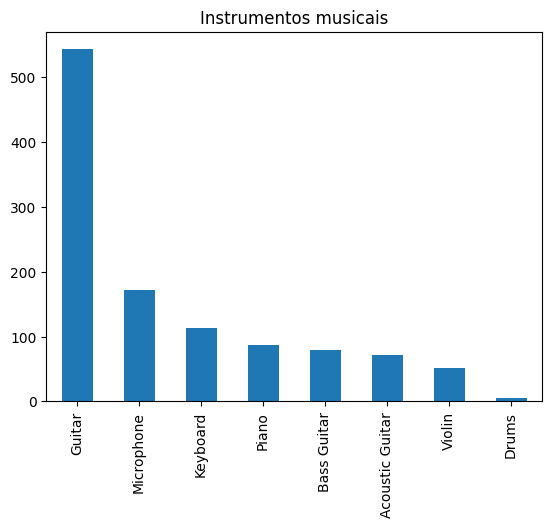

In [11]:
#Visualizando a proporção de imagens por classe
print((df['class']).value_counts())
instruments_count = df['class'].value_counts().plot.bar(title='Instrumentos musicais')

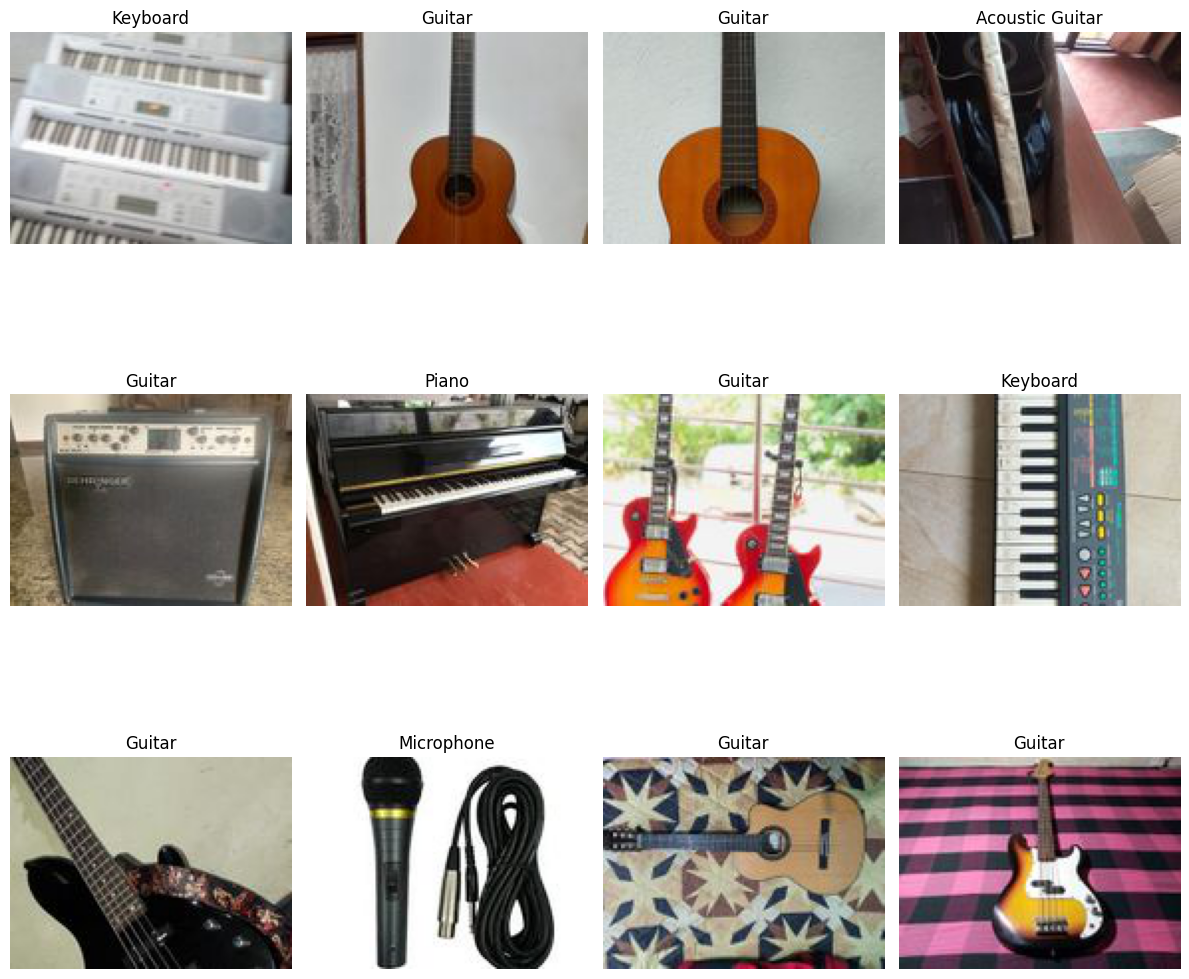

In [12]:
#Visualizando algumas imagens do conjunto de dados
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
df_random = df.sample(frac=1).reset_index(drop=True).head(12)
for i, row in df_random.iterrows():
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    classe = row['class']
    img_name = row['images']
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(classe)
plt.tight_layout()
plt.show()

In [13]:
#Dividindo o dataset em 70% para treino e 30% para teste
train, test = train_test_split(df[['images', 'class', 'height', 'width', 'channels', 'filesize']], test_size=0.3, random_state=42, shuffle=True)
#visualizando a divisão dos dados:
print("CONJUNTO DE TREINO")
display(train)
print("CONJUNTO DE TESTE")
display(test)

CONJUNTO DE TREINO


,images,class,height,width,channels,filesize
716,1634111294185_Semi Acoustic Guitar Box Marti...,Acoustic Guitar,107,142,3,2508
599,1634111745327_YAMAHA YP30 Piano for sale.jpg,Piano,107,142,3,3709
65,1634110463922_Semi Acoustic Box Guitar for sal...,Guitar,107,142,3,4539
956,1634117837020_Yamaha LU90 PE Acoustic Piano fo...,Piano,107,142,3,3755
1019,1634117907604_Crusader Brand New Guitar for sa...,Guitar,107,142,3,5242
...,...,...,...,...,...,...
466,1634113179583_Semi Acoustic Guitars for sale.jpg,Acoustic Guitar,107,142,3,4549
121,1634117934484_Morris Guitar for sale.jpg,Guitar,107,142,3,5023
1044,1634117673560_Studio Microphone Pop Filter for...,Microphone,107,142,3,2748
1095,1634111117616_Martinlee Acoustic Electric Guit...,Guitar,107,142,3,4385


CONJUNTO DE TESTE


,images,class,height,width,channels,filesize
971,1634110151122_Keyboard for sale.jpg,Keyboard,107,142,3,3973
824,1634117642068_Electric Guitar for sale.jpg,Guitar,107,142,3,3788
96,1634109977934_Box Guitar with Cover for sale.jpg,Guitar,107,142,3,3255
665,1634111710672_Samson Mk10 Lightweight Micropho...,Microphone,107,142,3,847
1064,1634112765124_Violin for sale.jpg,Violin,107,142,3,4417
...,...,...,...,...,...,...
351,1634110994543_Yamaha PSR 260 Keyboard for sal...,Keyboard,107,142,3,5892
900,1634117936500_Yamaha EG 112 Electric Lead Rhyt...,Guitar,107,142,3,5041
1056,1634117404507_Super Lark Violin for sale.jpg,Violin,107,142,3,3814
626,1634111802633_Classical Guitar for sale.jpg,Guitar,107,142,3,2726


# Preparação dos dados

ImageDataGenerator é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

Utilizamos ainda o ImageDataGenerator para separar um conjunto de validação com 20% das amostras do conjunto de treino. É importante que o conjunto de validação não contenha as imagens de teste, tendo em vista que elas não deveriam ser conhecidas no momento do treinamento.

Veja que neste caso é usado o método flow_from_dataframe() para gerar imagens aumentadas a partir de um dataframe que aponta para as imagens originais. O método recebe parâmetros como o dataframe, o diretório com as imagens, o tamanho do lote (batch size) e o modo de classe (neste caso, binário porque são apenas duas classes), entre outros.

Importante ressaltar que o pré-processamento do teste não evolve o aumento de dados.

In [23]:
train_datagen=ImageDataGenerator(validation_split=0.2, #include validation split
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

val_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )

test_generator=test_datagen.flow_from_dataframe(
    test ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',)

Found 629 validated image filenames belonging to 8 classes.
Found 157 validated image filenames belonging to 8 classes.
Found 337 validated image filenames belonging to 8 classes.


Visualizando um exemplo do tratamento das imagens

Found 1 validated image filenames belonging to 1 classes.


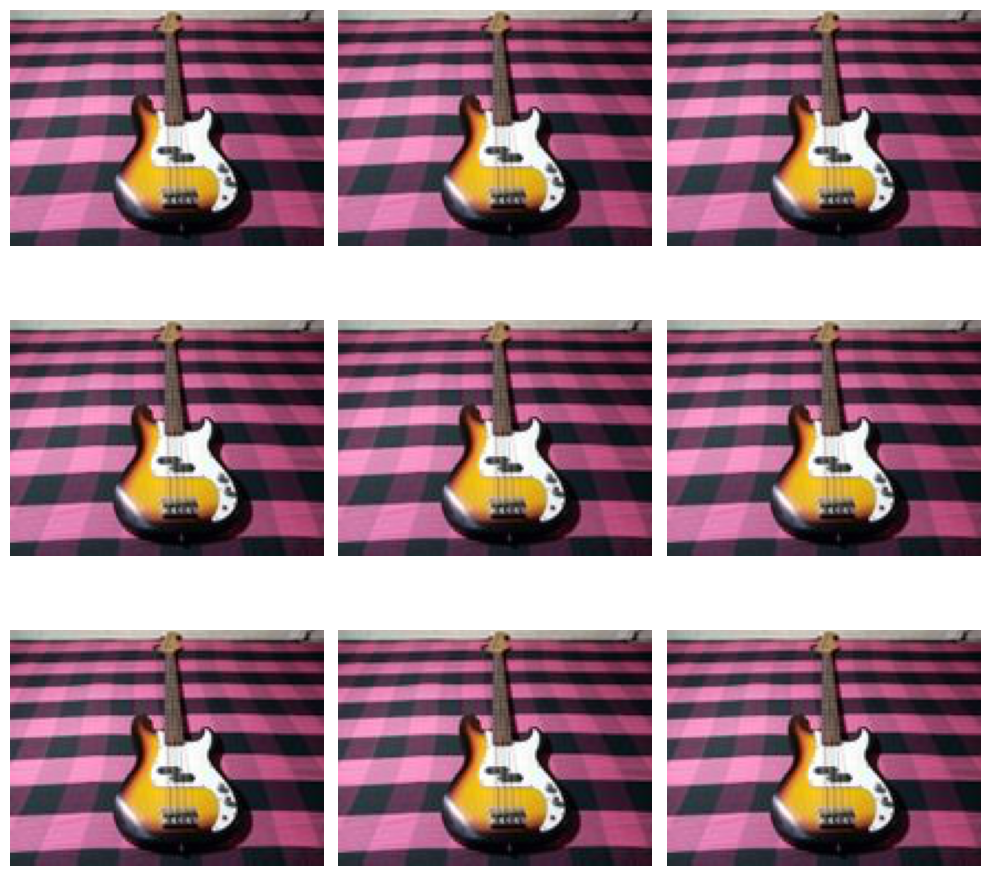

In [15]:
# Pegando um registro do dataframe
sample = df.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(img)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

# Configuração de um modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras

Definição da arquitetura do modelo
Aqui é especificada uma camada convolucional 2D que possui 32 filtros, um tamanho de filtro de 3x3 que usa a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Na sequência são adicionadas camadas max-pooling com a mesma função de ativação.

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

O método summary() é usado para exibir um resumo da arquitetura do modelo de rede neural. Ele fornece uma representação compacta das camadas do modelo e seus parâmetros, incluindo o número de parâmetros treináveis e a forma de saída de cada camada.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Treinamento do modelo de deep learning

Compilação do modelo Keras com as configurações do treinamento
optimizer='adam': especifica o otimizador a ser usado durante o treinamento.

loss='binary_crossentropy': especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação binária, onde a variável alvo tem apenas duas categorias, a perda binária de entropia cruzada é freqüentemente empregada.

metrics=['accuracy']: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

O método fit_generator() inicia o processo de treinamento do modelo usando o gerador de dados para o treinamento train_generator e o gerador de dados de validação val_generator.

In [19]:
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
13/13 [==============================] - 46s 3s/step - loss: 1.9552 - accuracy: 0.3498 - val_loss: 1.6429 - val_accuracy: 0.4904
Epoch 2/20
13/13 [==============================] - 40s 3s/step - loss: 1.5956 - accuracy: 0.4769 - val_loss: 1.6277 - val_accuracy: 0.4522
Epoch 3/20
13/13 [==============================] - 41s 3s/step - loss: 1.4902 - accuracy: 0.5024 - val_loss: 1.5346 - val_accuracy: 0.4459
Epoch 4/20
13/13 [==============================] - 40s 3s/step - loss: 1.4485 - accuracy: 0.4976 - val_loss: 1.5145 - val_accuracy: 0.4713
Epoch 5/20
13/13 [==============================] - 41s 3s/step - loss: 1.3991 - accuracy: 0.5262 - val_loss: 1.4742 - val_accuracy: 0.5159
Epoch 6/20
13/13 [==============================] - 41s 3s/step - loss: 1.3259 - accuracy: 0.5644 - val_loss: 1.4079 - val_accuracy: 0.5223
Epoch 7/20
13/13 [==============================] - 41s 3s/step - loss: 1.2955 - accuracy: 0.5326 - val_loss: 1.4601 - val_accuracy: 0.4650
Epoch 8/20
13/13 [==

# Execução do modelo treinado em um subconjunto das imagens de teste

Idealmente se deseja realizar a inferência sobre todo o conjunto de teste, porém para efeitos de agilidade, executamos apenas em um subconjunto de imagens.

2/2 [==============================] - 1s 220ms/step


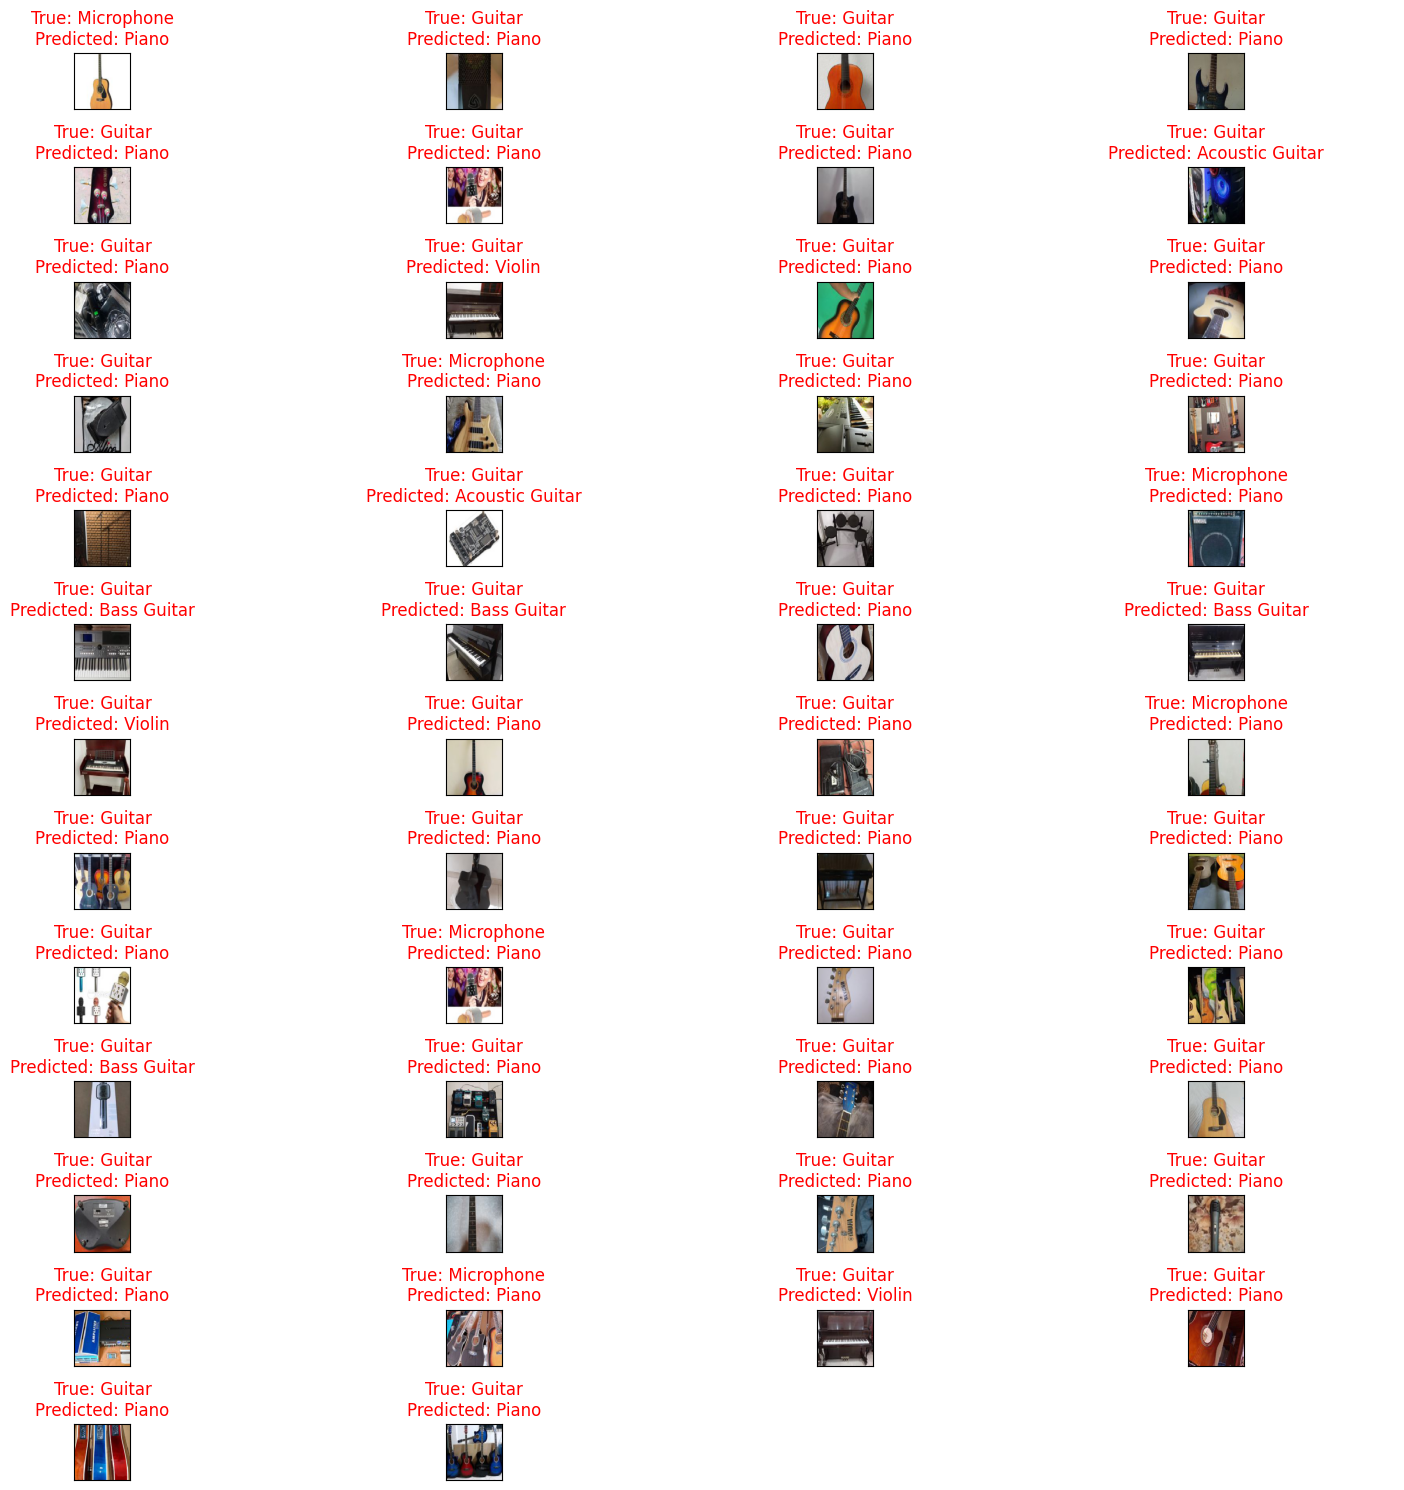

In [39]:
count = 0
class_names = ['Guitar', 'Microphone', 'Keyboard', 'Piano', 'Bass Guitar', 'Acoustic Guitar', 'Violin', 'Drums']
y_pred = []
y_true = []

# Percorrendo a pasta onde estão salvas as imagens de teste
for i in test_generator:
    count += 1

    if count == 2:
        break
    else:
        images = i[0]
        labels = i[1]
        predictions = model.predict(images)
        for j in range(len(images)):
            image = images[j]
            label = labels[j]
            prediction = predictions[j]
            # Converte o array de previsão para visualizar a classe e a probabilidade
            predicted_class = np.argmax(prediction)
            probability = prediction[predicted_class]
            # Convert each element of the 'labels' array to its corresponding class name
            label = [class_names[int(l)] for l in label]
            y_true.extend(label)
            y_pred.append(class_names[predicted_class])

# Now y_true contains the true labels, and y_pred contains the predicted labels.

# Função para exibir as imagens com as informações
            def plot_images_with_labels(images, true_labels, predicted_labels, class_names, probabilities=None, n_cols=4):
              n_rows = int(np.ceil(len(images) / n_cols))
              fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

              for i, ax in enumerate(axes.flat):
                if i < len(images):
                  ax.imshow(images[i], cmap='gray')
                  ax.set_xticks([])
                  ax.set_yticks([])

                  true_label = true_labels[i]
                  predicted_label = predicted_labels[i]
                  probability = probabilities[i] if probabilities else None

                  ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}', color=('green' if true_label == predicted_label else 'red'))

                  if probabilities:
                    ax.set_xlabel(f'Probability: {probability:.2f}')
                else:
                  ax.axis('off')

              plt.tight_layout()
              plt.show()

# Chame a função para exibir as imagens
plot_images_with_labels(images, y_true, y_pred, class_names, probabilities=None)






In [40]:
#imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crie a matriz de confusão
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Exiba a matriz de confusão usando um heatmap do Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: ignored